In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
df = pd.read_csv("../../input/train.csv")
qualitative = list(df.columns[df.dtypes == "object"])
#qualitative += [x for x in df.select_dtypes(include=['float64',"int64"]).columns if len(df[x].unique()) <= 10]
#quantitative = [x for x in df.select_dtypes(include=['float64',"int64"]).columns if len(df[x].unique()) > 10]
quantitative = df.select_dtypes(include=['float64',"int64"]).columns[:-1]
df[qualitative] = df[qualitative].fillna("None")
df[quantitative] = df[quantitative].fillna(0)
SalePrice = df.SalePrice

In [ ]:
#PCA can cluster to explain the variance

In [41]:
key = pd.DataFrame(columns=["index"], index=pd.MultiIndex.from_tuples([], names=['variable','value']))
qualDf = df[qualitative]
for x in qualitative:
    kf = df.groupby(x)["SalePrice"].mean().to_frame().sort_values("SalePrice").reset_index().reset_index().drop(columns=["SalePrice"])
    kf["variable"] = x
    key = pd.concat([key, kf.rename(columns={x:"value"}).set_index(["variable","value"])])

reshape_df = pd.melt(df, id_vars="Id", value_vars=qualitative).merge(key, on=["variable","value"])
qualDf= reshape_df.pivot(index='Id', columns='variable')["index"]
df = qualDf.merge(df[quantitative], on=["Id"])

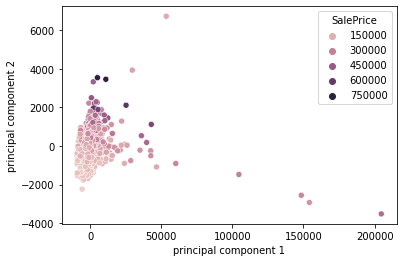

In [58]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf["SalePrice"] = SalePrice
sns.scatterplot(data=principalDf[principalDf["principal component 1"]<1000000], x="principal component 1", y="principal component 2", hue="SalePrice")



In [63]:
principalDf[principalDf["SalePrice"]>600000]

,principal component 1,principal component 2,SalePrice
691,11102.362904,3464.447309,755000
898,2460.804293,1974.322169,611657
1169,25299.196391,2117.648766,625000
1182,5197.042533,3547.363708,745000


In [43]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0, perplexity=50)
X = df
tsne = model.fit_transform(X)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(tsne)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

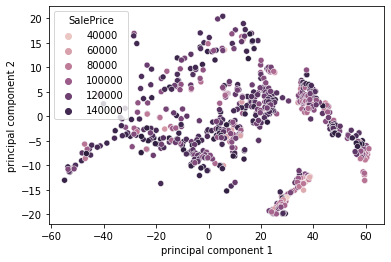

In [44]:
principalDf["SalePrice"] = SalePrice
sns.scatterplot(data=principalDf[(principalDf["principal component 1"]<50000) & (principalDf["SalePrice"]<150000)], x="principal component 1", y="principal component 2", hue="SalePrice")



0.7429520186789718


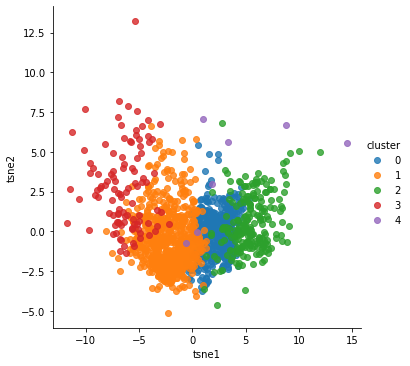

In [53]:
model = TSNE(n_components=2, random_state=0, perplexity=50)
X = df.values
tsne = model.fit_transform(X)

std = StandardScaler()
s = std.fit_transform(X)
pca = PCA(n_components=30)
pca.fit(s)
pc = pca.transform(s)
kmeans = KMeans(n_clusters=5)
kmeans.fit(pc)

fr = pd.DataFrame({'tsne1': pc[:,0], 'tsne2': pc[:, 1], 'cluster': kmeans.labels_})
sns.lmplot(data=fr, x='tsne1', y='tsne2', hue='cluster', fit_reg=False)
print(np.sum(pca.explained_variance_ratio_))

array([ 0.31569433, -1.53321461,  0.2403908 , ...,  2.17059053,
       -2.71425911, -1.95657853])